In [1]:
#import module
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  sklearn.model_selection import train_test_split

In [2]:
fruits=pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

In [24]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [23]:
fruits.apply(lambda x:sum(x.isnull()),axis=0)

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [5]:
lookup_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## create train-test split

In [19]:
x=fruits[['mass','width','height','color_score']]
y=fruits['fruit_label']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## examining data

<IPython.core.display.Javascript object>


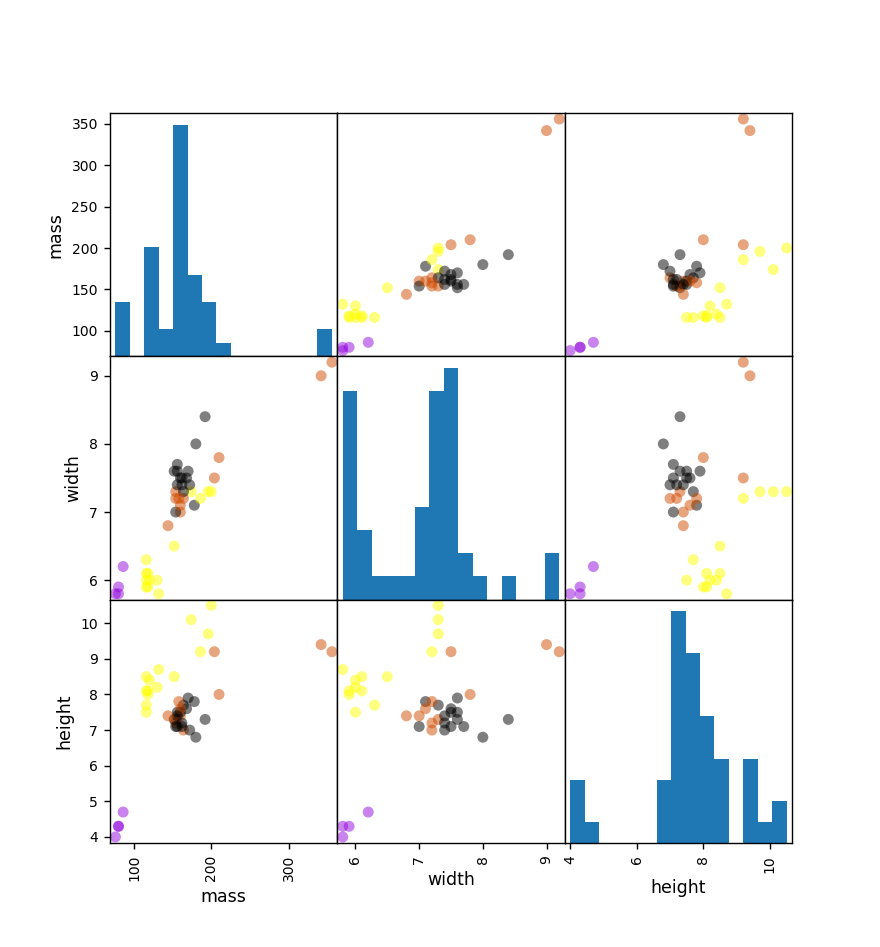

In [15]:
cmap=plt.cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(x_train,c=y_train,marker='o',s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)

In [12]:
import mpl_toolkits.mplot3d as mt

<IPython.core.display.Javascript object>


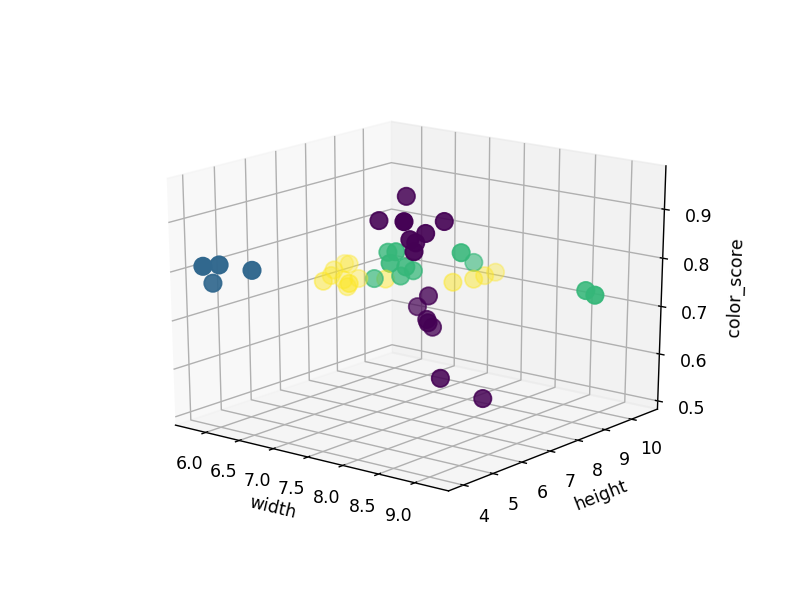

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_train['width'],x_train['height'],x_train['color_score'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## Create Classifier object

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

## train the classifier

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## estimate the accuracy of the classifier on test data

In [28]:
knn.score(x_test,y_test)

0.5333333333333333

## use for unseen object

In [35]:
fruit_prediction=knn.predict([[152,6.5,5.2,0.66]])
lookup_fruit_name[fruit_prediction[0]]

'apple'

In [36]:
fruit_prediction=knn.predict([[52,6.5,5.2,0.44]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

## KNN classification accuracy to choice of the 'k' parameter

<IPython.core.display.Javascript object>


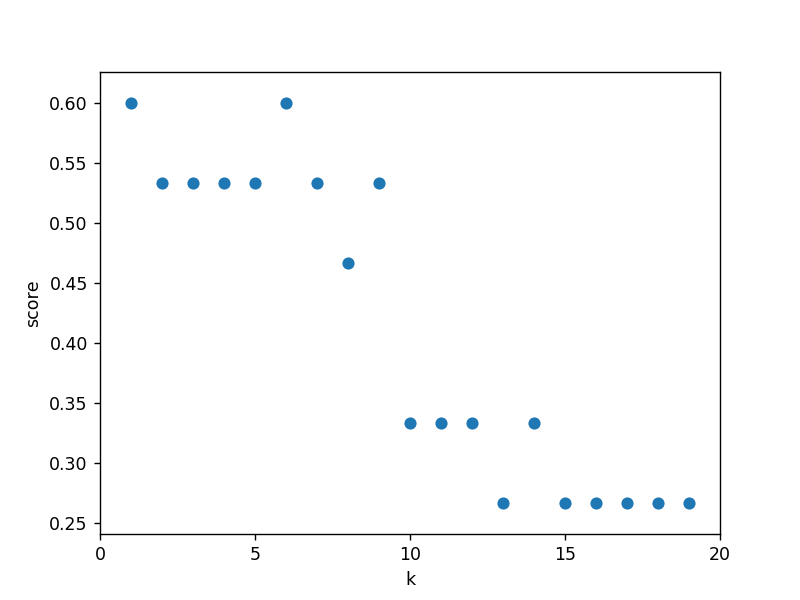

In [45]:
k_range=range(1,20)
score=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_test,y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('score')
plt.scatter(k_range,score)
plt.xticks([0,5,10,15,20]);

# END!